::: {.hidden}
$$
\newcommand{\R}{\mathbb{R}}
\newcommand{\cP}{\mathcal{P}}
\newcommand{\vx}{\mathbf{x}}
\newcommand{\vp}{\mathbf{p}}
\newcommand{\vy}{\mathbf{y}}
\newcommand{\vz}{\mathbf{z}}
\newcommand{\vd}{\mathbf{d}}
\newcommand{\mX}{\mathbf{X}}
\newcommand{\mR}{\mathbf{R}}
\newcommand{\mW}{\mathbf{W}}
\newcommand{\mY}{\mathbf{Y}}
\newcommand{\mZ}{\mathbf{Z}}
\newcommand{\vw}{\mathbf{w}}
\newcommand{\vr}{\mathbf{r}}
\newcommand{\vq}{\mathbf{q}}
\newcommand{\mP}{\mathbf{P}}
\newcommand{\vzero}{\mathbf{0}}
\newcommand{\bracket}[1]{\langle #1 \rangle}
\newcommand{\paren}[1]{\left( #1 \right)}
\newcommand{\one}[1]{\mathbb{1}\left[ #1 \right]}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cD}{\mathcal{D}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\mA}{\mathbf{A}}
\newcommand{\vtheta}{\boldsymbol{\theta}}
\newcommand{\vsigma}{\boldsymbol{\sigma}}
\newcommand{\norm}[1]{\lVert #1 \rVert}
\newcommand{\abs}[1]{\lvert #1 \rvert}
\newcommand{\prob}[1]{\mathbb{P}\left[#1\right]}
\newcommand{\E}{\mathbb{E}}
\newcommand{\dd}[2]{\frac{\partial #1}{\partial #2}}

\usepackage{amsmath}
\DeclareMathOperator*{\argmax}{arg\,max}
\DeclareMathOperator*{\argmin}{arg\,min}
$$

:::


So far in this course, we've focused exclusively on *classification* tasks: how to predict a *categorical label* for each data point. The other important task we need to consider is *regression*, in which we predict a real number for each data point based on its features. Here's the stereotypical example: 

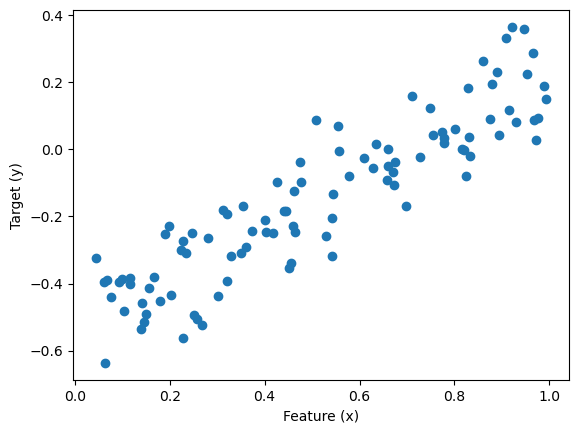

In [1]:
import numpy as np
from matplotlib import pyplot as plt

w0 = -0.5
w1 =  0.7

n = 100
x = np.random.rand(n, 1)
y = w1*x + w0 + 0.1*np.random.randn(n, 1)

plt.scatter(x, y)
labels = plt.gca().set(xlabel = "Feature (x)", ylabel = "Target (y)")

Looking at this data, we can see an apparent linear trend that we would like to use in order to make prediction on new data points.  


## Mathematical Formulation

We're going to focus on *least-squares linear regression*. The nice thing about least-squares linear regression is that it falls perfectly into our framework of convex linear models. In least-squares linear regression, we still make predictions of the form $\hat{y}_i = \bracket{\vw, \vx_i}$, since these are exactly linear predictions! The loss function is $\ell(\hat{y}, y) = (\hat{y} - y)^2$, the *squared error*, which is convex. The empirical risk minimization problem is 

$$
\begin{aligned}
\hat{\vw} &= \argmin_{\vw} \; L(\vw) \\ 
          &= \sum_{i = 1}^n \ell(\hat{y}_i, y_i) \\ 
          &= \argmin_{\vw} \sum_{i = 1}^n \left(\bracket{\vw, \vx_i} - y_i \right)^2\;. 
\end{aligned}
$$
It's useful to write this in a more compact way using matrix-vector notation: the loss function $L(\vw)$ can be written 

[Reminder: $\mX \in \R^{n\times p}$, $\vw \in \R^{p}$, $\mX\vw \in \R^n$, which is the same dimension as $\vy$. ]{.aside}
$$
L(\vw) = \norm{\mX\vw - \vy}_2^2\;.
$$

So, we want to solve the problem 

$$
\hat{\vw} = \argmin_{\vw} \; L(\vw) = \argmin_{\vw} \; \norm{\mX\vw - \vy}_2^2\;.
$${#eq-least-squares}





## Solution Methods

There are a *lot* of ways to solve @eq-least-squares. Let's start by taking the gradient with respect to $\hat{\vw}$. Using the multivariate chain rule, this is 

$$
\nabla L(\vw) = 2\mX^T(\mX\vw - \vy)\;.
$${#eq-gradient}

One way to approach the linear regression problem is with gradient descent: repeat the iteration 

$$
\vw^{(t+1)} \gets \vw^{(t)} - 2\alpha \mX^T(\mX\vw^{(t)} - \vy)
$$

to convergence. As it turns out, there's also an explicit formula involving a matrix inversion that we can obtain by using the condition $\nabla L(\vw) = \vzero$ which must hold at the minimum. Plugging in our expression for $L(\vw)$, we get   

$$
\vzero = \mX^T(\mX\hat{\vw} - \vy)\;.
$$

To start solving for $\hat{\vw}$, we can move $\mX^T\vy$ to the other side: 

$$
\mX^T\mX\hat{\vw} = \mX^T\vy\;.
$$

[This requires that there are at least $p$ linearly independent rows of $\mX$. In particular, $\mX$ must have at least as many rows as it has columns.]{.aside}
Now, *provided that the matrix $\mX^T\mX$ is of full rank*,  we can multiply both sides by $(\mX^T\mX)^{-1}$ to obtain 
$$
\hat{\vw} = (\mX^T\mX)^{-1}\mX^T\vy\;,
$${#eq-regression-explicit}
which is an explicit formula for $\hat{\vw}$. 

Let's see if we can use this to compute predictions for our fake data above. In order for this formula to work, we need to ensure that $\mX$ is padded with a vector of ones. 

In [2]:
def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

X = pad(x)

Now we can use the formula: 

In [4]:
w_hat = np.linalg.inv(X.T@X)@X.T@y
w_hat

array([[ 0.73891603],
       [-0.52603929]])

Let's test this out on our fake data: 

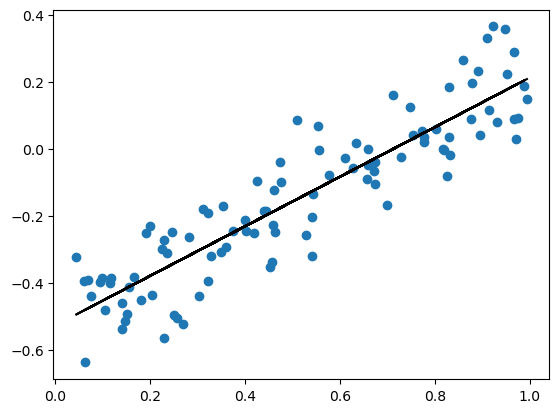

In [6]:
y_hat = X@w_hat
plt.scatter(x, y)
plt.plot(x, y_hat, color = "black")

Not bad! 

::: {.callout-warning} 

## Activity 1: Computational Complexity of Exact Least-Squares Regression

Multiplying a $k\times \ell$ matrix with an $\ell \times k$ matrix using the standard algorithm has time complexity $k \ell^2$. Inverting a $k\times k$ matrix (when the inverse exists) has time complexity $k^3$. Left-multiplying a $k\times k$ matrix and a $k$-vector has time complexity $k^2$. 

With these facts in mind, describe the time complexity of computing $\hat{\vw}$ using @eq-regression-explicit in terms of the number of data points $n$ and the number of features $p$. What would the computational bottleneck when the number of data points $n$ is very large? What about what the number of features $p$ is very large? 

[As a reminder, we are talking about the formula $\hat{\vw} = (\mX^T\mX)^{-1}\mX^T\vy\;,$.]{.aside}

:::

::: {.callout-warning} 

## Activity 2: Computational Complexity of Gradient Descent

As you'll implement in your blog post, gradient descent can actually be implemented via the iteration 

$$
\vw^{(t+1)} = \vw^{(t)} - \alpha (\mP \vw^{(t)} - \vq)\;,
$$

where $\mP$ is a $p \times p$ matrix and $\vq$ is a $p$-vector. [The trick is to precompute some matrix products]{.aside} What is the time complexity of a single iteration of gradient descent? 

Of course, a full analysis of the time complexity of the gradient descent algorithm as a whole requires knowing how many iterations are necessary to achieve acceptable accuracy, which is a much harder problem. 

:::

## Scoring Linear Models

A good, simple way to score linear models is by using the loss function directly: smaller values are better! In `scikit-learn`, regression models are instead scored using an affine transformation of the loss function called the *coefficient of determination*. The coefficient of determination is `1` when the model fits the data perfectly with no errors. It can be arbitrarily negative (e.g. `-8.7`) if the model fits the data very poorly. 

For a quick illustration, here's the `scikit-learn` implementation of linear regression: 

Let's evaluate our model on similar, unseen data: 

In [ ]:
n = 100
x_val = np.random.rand(n, 1)
y_val = w1*x_val + w0 + 0.1*np.random.randn(n, 1)

As usual, gaps between the training and validation scores suggest the *possibility* of overfitting, although further investigation is required to see whether improvement on validation data is possible. 

## Incorporating Features

Sometimes (most of the time), the patterns we are looking for in our data are not actually linear. For example: 

In [ ]:
x = 2*np.pi*np.random.rand(n, 1)
y = np.sin(x) + 0.2*np.random.randn(n, 1)

plt.scatter(x, y)

Just like in the case of classification, we can use *feature maps* to learn nonlinear patterns. For example: 

The feature matrix $\Phi$ now plays the role of $\mX$, and we can use the same formula as earlier: 

The predictions are

Let's visualize: 

In [ ]:
plt.scatter(x, y)

x_lin = np.linspace(0, 2*np.pi, 1001)[:,np.newaxis]
PHI_lin = p.fit_transform(x_lin)
y_trend = PHI_lin@w_hat

plt.plot(x_lin, y_trend, color = "black")

Hmmm, this is not a very impressive fit. Let's wrap this process in a function and do a few experiments. 

In [ ]:
def poly_viz(deg, ax):
    p = PolynomialFeatures(deg)
    PHI = p.fit_transform(x)
    w_hat = np.linalg.inv(PHI.T@PHI)@PHI.T@y
    x_lin = np.linspace(x.min(), x.max(), 1001)[:,np.newaxis]
    PHI_lin = p.fit_transform(x_lin)
    y_trend = PHI_lin@w_hat
    ax.scatter(x, y)
    ax.plot(x_lin, y_trend, color = "black")

As in classification, the use of polynomial features makes us susceptible to overfitting, and validation or cross-validation should be used in order to select a good degree. 

### Kernel Regression

*Kernel methods* offer a theoretically-grounded approach for dealing with nonlinearity in both classification and regression. [You can implement a kernel classification method in [this blog post](../assignments/blog-posts/blog-post-kernel-logistic.qmd).]{.aside} In kernel methods, the feature vector corresponding to each data point $\vx_i$ is actually in terms of all the other points: 

$$
\phi(\vx_i) = \left(\begin{matrix}
                k(\vx_i, \vx_1) \\ 
                k(\vx_i, \vx_2) \\ 
                \cdots \\ 
                k(\vx_i, \vx_n) \\ 
              \end{matrix}\right)
$$

Here, $k:\R^{p} \times \R^{p} \rightarrow \R$ is a special function called a *kernel function*. Usually the kernel function is a measure of how similar two points are. A very common and useful kernel is the radial basis function (RBF) kernel 

$$
k(\vx_1, \vx_2) = e^{-\gamma \norm{\vx_1 - \vx_2}^2}\;.
$$

This function is largest when $\vx_1 = \vx_2$, and decreases as these two vectors become farther apart. The idea of kernel methods is that the prediction can be expressed as a weighted sum of the target values at nearby points. 

Kernel methods have extremely beautiful mathematics behind them and are fun to implement, but for today we can just show the implementation in `scikit-learn`: 

Different values of `gamma` will result in more or less "wiggly" fits. `gamma` should be tuned using validation or cross validation in order to protect against overfitting.  

## Activity


The following code produces a random feature matrix $\mX$ and weight vector $\vw$: 

In [ ]:
X = np.random.rand(10, 3)
X = pad(X)
w = np.random.rand(X.shape[1])

y = X@w + np.random.randn(X.shape[0])

1. Implement a `predict` function that computes `y_hat` from `X` and `w` (*hint: don't overthink it*). 
2. Implement a `score` function that accepts `X`, `y`, and `w` as arguments and computes the *coefficient of determination* of the predictions. The coefficient of determination is 
$$
c = 1 - \frac{\sum_{i = 1}^n (\hat{y}_i - y_i)^2}{\sum_{i = 1}^n (\bar{y}_i - y_i)^2}\;,
$$
where  $\bar{y} = \frac{1}{n} \sum_{i = 1}^n$. 

You can modify these functions and use them in the [blog post on linear regression](../assignments/blog-posts/blog-post-bias-allocative.qmd). 
